PCA rotates the dataset in a way s.t the rotated features are statistically uncorrelated, or in other words, show maximum variance. It can be used to visualize high-dimensional datasets as well.

In [24]:
# pair plot of the Iris data
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris.data, iris.target, random_state=42)

In [25]:
iris_df = pd.DataFrame(train_input, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.6,1.4,0.2
1,5.2,4.1,1.5,0.1
2,5.8,2.7,5.1,1.9
3,6.0,3.4,4.5,1.6
4,6.7,3.1,4.7,1.5


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

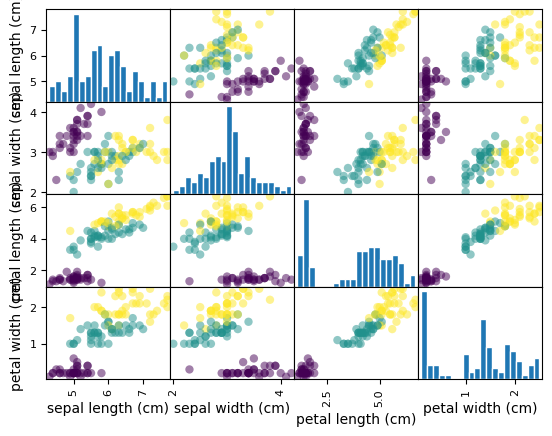

In [33]:
import matplotlib as mpl
pd.plotting.scatter_matrix(iris_df, c=train_target, diagonal='hist', marker='o', cmap='viridis', hist_kwds={'bins':20, 'edgecolor':'white'})

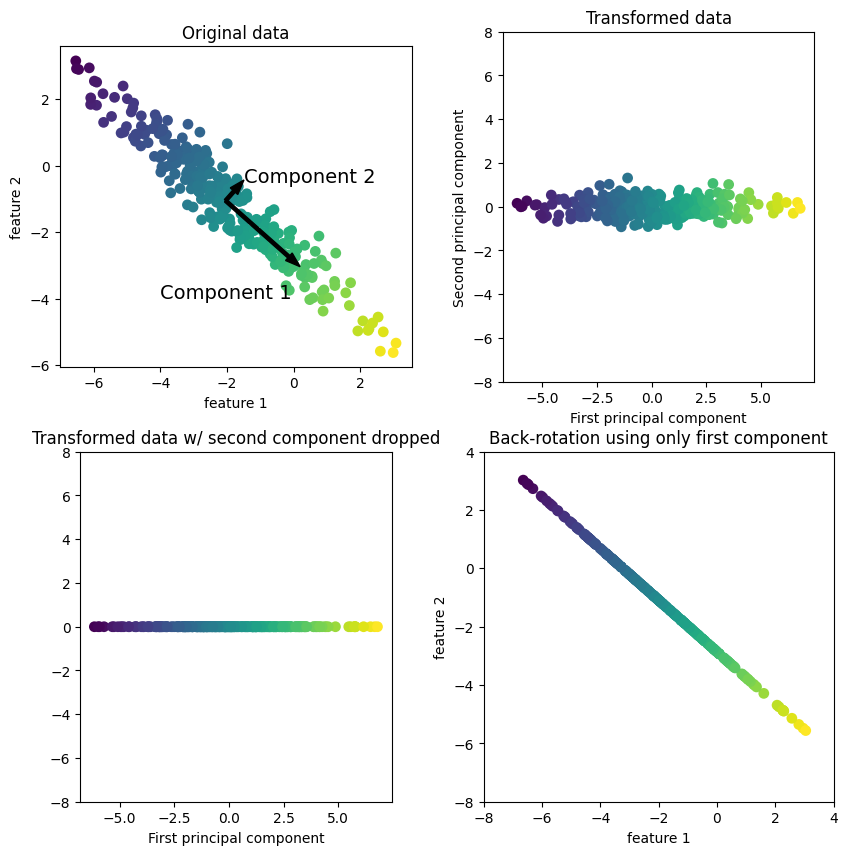

In [34]:
# pca overview
import mglearn
mglearn.plots.plot_pca_illustration()

In [41]:
# apply PCA to the breast cancer data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(cancer.data)
ss_cancer = ss.transform(cancer.data)
ss_cancer.shape

(569, 30)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ss_cancer)
pca_ss_cancer = pca.transform(ss_cancer)
pca_ss_cancer.shape

(569, 2)

In [50]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

<Axes: xlabel='pc1', ylabel='pc2'>

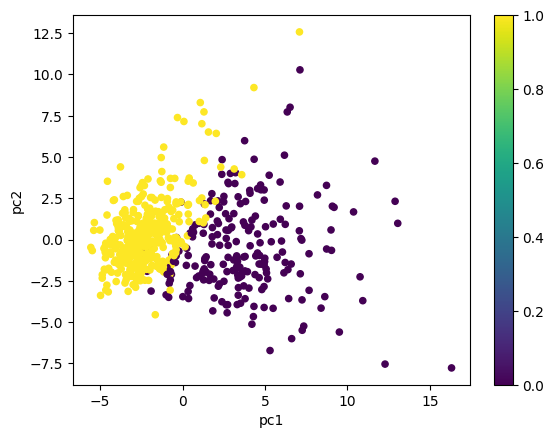

In [53]:
# plot two principal components
pca_df = pd.DataFrame(pca_ss_cancer)
pca_df.plot(x=0, y=1, kind='scatter', c=cancer.target, cmap='viridis', legend=['malignant','benign'], xlabel='pc1', ylabel='pc2')

In [54]:
# principal components are the linear combination of the existing variables
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

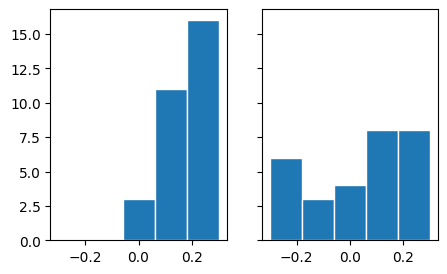

In [64]:
import matplotlib.pyplot as plt
import numpy as np
fix, axs = plt.subplots(1,2, figsize=(5,3), sharex=True, sharey=True)
axs[0].hist(pca.components_[0], edgecolor='w', bins=np.linspace(-0.3,0.3,6))
axs[1].hist(pca.components_[1], edgecolor='w', bins=np.linspace(-0.3,0.3,6))
plt.show()

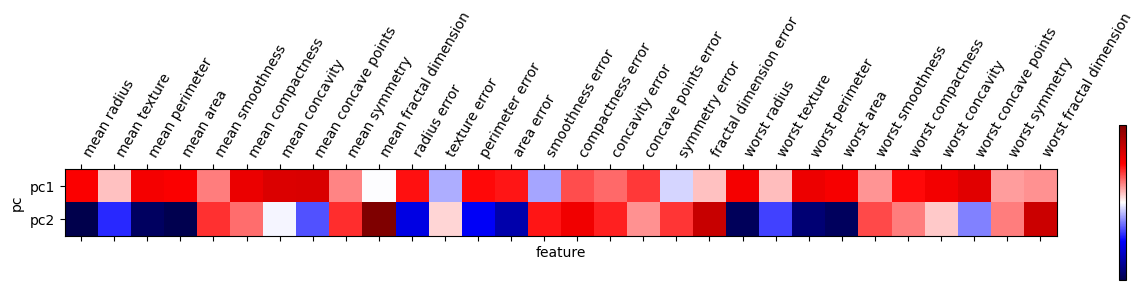

In [84]:
# visualize the values with heatmap
plt.matshow(pca.components_, cmap='seismic')
plt.yticks([0,1], ['pc1', 'pc2'])
cbar = plt.colorbar(ticks=[-1,1])
cbar.ax.set_yticklabels(['-1','1'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('pc')
plt.show()

In [86]:
# importance of each feature can be checked as follows
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[13.30499079  5.7013746 ]
[0.44272026 0.18971182]


[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


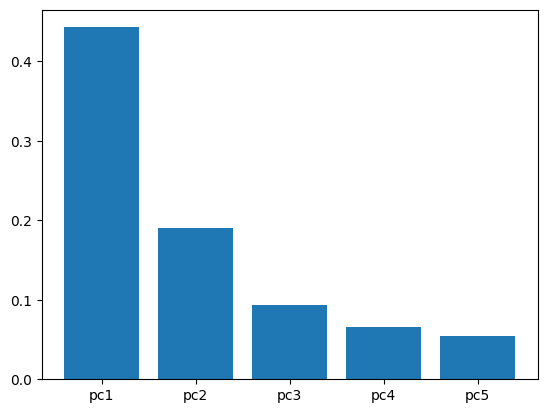

In [87]:
# try a larger number. There are as many principal components as original features

pca = PCA(n_components=5)
pca.fit(ss_cancer)
pca_ss_cancer = pca.transform(ss_cancer)
print(pca.explained_variance_ratio_)

plt.bar(['pc1','pc2','pc3','pc4','pc5'], pca.explained_variance_ratio_)
plt.show()

In [105]:
# to print their numerical importance on the bars,
def write_val(ax, val):
    '''print corresponding values onto objects'''
    for idx, patch in enumerate(ax.patches):
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()

        ax.text(x=left_coord + width/2.0,
                y=height + len(val)*0.001,
                s=f'{val[idx]:1.3f}',
                ha='center')

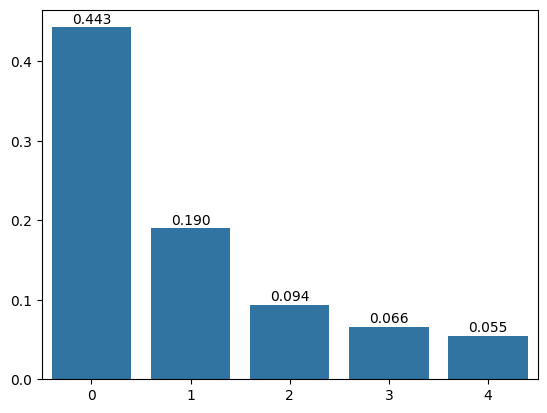

In [106]:
import seaborn as sns

ax = sns.barplot(pca.explained_variance_ratio_)
write_val(ax, pca.explained_variance_ratio_)
plt.show()

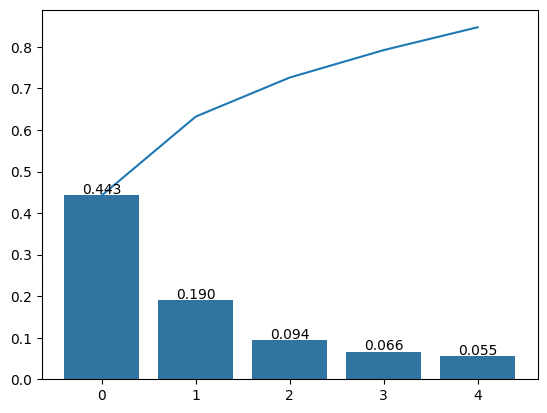

In [120]:
# visualize the ratios differently with the use of cum sum
ax = sns.barplot(pca.explained_variance_ratio_)
ax = sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
write_val(ax, pca.explained_variance_ratio_)
plt.show()

In [126]:
ss = StandardScaler()
ss.fit(iris.data)
ss_iris = ss.transform(iris.data)
ss_iris.shape

(150, 4)

In [127]:
# NMF(Non-Negative Matrix Factorization); applicable to positive data only

from sklearn.decomposition import NMF
nmf = NMF(n_components=5, init='nndsvd', random_state=42, tol=0.02)
nmf.fit(ss_iris)
nmf_ss_iris = nmf.transform(ss_iris)

ax = sns.barplot(nmf.explained_variance_ratio_)
write_val(ax, nmf.explained_variance_ratio_)
plt.show()

ValueError: Negative values in data passed to NMF (input X)

In [130]:
np.any(ss_iris<0)

np.True_